# A. Latar Belakang & Tujuan Analisis

Analisis bisnis ini disusun untuk memberikan rekomendasi kepada Chief Business Officer (CBO) air bnb mengenai langkah-langkah bisnis yang perlu dilakukan oleh perusahaan untuk menjaga sustainability dan pertumbuhan bisnis ke depan. Salah satu tolak ukur yang mencerminkan pertumbuhan bisnis perusahaan adalah peningkatan revenue. Analisis ini akan berfokus pada bagaimana perusahaan dapat meingkatkan revenue ke depannya.

Sebagai pemilik platform dan juga pihak perantara, airbnb memiliki akses penuh terhadap seluruh database transaksi sewa-menyewa yang dilakukan melalui platform airbnb. Dengan memanfaatkan database tersebut, airbnb dapat memperoleh analisis komprehensif untuk menentukan langkah-langkah bisnis sebagai upaya untuk meningkatkan revenue ke depan.


# B. Airbnb Business Model

Air bnb merupakan marketplace yang menghubungkan pemilik tempat tinggal (hosts) dengan penyewa (travelers/visitors) melalui online platform yang dapat memfasilitasi proses transaksasi sewa-menyewa. Dari sudut pandang host, airbnb memungkinkan pemilik tempat tinggal untuk mendaftarkan tempat tinggal miliknya (disebut list) untuk memperoleh uang sewa. Sedangkan dari sudut visitor, air bnb menawarkan akses yang mudah untuk mencari, membandingkan, memilih dan menyewa tempat tinggal di berbagai belahan dunia.

Pada proses transaksi sewa-menyewa, Airbnb memperoleh penghasilan dari 2 sumber, yaitu:
1. Komisi dari host untuk setiap transaksi sebesar 3%-5%
2. Service fee dari visitor sebesar 6%-20% dari booking fee

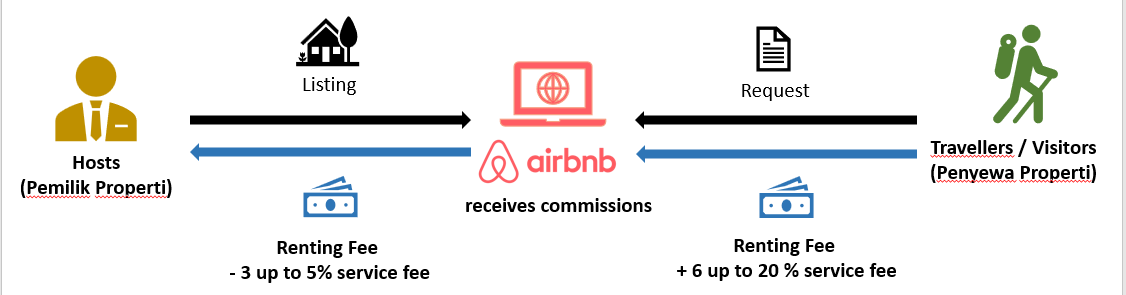


Berdasarkan informasi di lapangan, banyak host airbnb yang bukan pemilik tempat tinggal dan bertindak hanya sebagai agen untuk si pemilik rumah. Dengan demikian, melalui analisis data terkini, airbnb dapat memberikan informasi kepada host mengenai tempat tinggal seperti apa yang paling diminati pelanggan. Dengan demikian, host (yang sebagian bertindak sebagai agen)  memiliki acuan dalam mencari bisnis baru.


# C. Business Problems and Workflow
Berdasarkan business model dari airbnb, peningkatan revenue dapat diperoleh dengan cara meningkatkan volume transaksi sewa-menyewa. Lalu, bagaimana cara untuk dapat meningkatkan volume transaksi?

Peningkatan volume transaksi dapat terjadi apabila supply dan demand memiliki keselarasan. Oleh karena itu, analisis akan difokuskan pada analisis supply vs demand. Berikut adalah proses analisis yang akan dilakukan:

1. Mengetahui bagaimana kondisi listing dari bisnis airbnb baik dari sudut pandang:
    - supply (ketersediaan listing)
    - current demand (jumlah review 12 bulan terakhir)
    - overall demand (jumlah review keseluruhan tahun)
    
    Note:
    - Overal demand dapat menggambarkan sustainability ke depan
    - Current demand dapat menggambarkan peluang pertumbuhan ke depan
    
1. Kondisi listing pada poin 1 dapat ditinjau dari beberapa aspek, yaitu:
    - Letak geografis (neighbourhood)
    - Room type
    - Range Harga
1. Analisis akan dilakukan dengan membandingkan supply dan demand untuk masing-masing aspek pada poin 2. Setelah itu, apabila terdapat gap di antara keduanya, maka akan ditinjau lebih lanjut apakah gap tersebut dapat menimbulkan konsekuensi / peluang bisnis yang dapat berdampak pada sustainability dan pertumbuhan revenue ke depannya.

Asumsi: sebagian besar penyewa memberikan review setelah transaksi selesai, sehingga jumlah review menggambarkan jumlah transaksi

# D. Data

**Data Source**

https://drive.google.com/drive/folders/1A_KBMRFTS5Mthpp46nulso679ML4ZwTF

**Kolom dan Deskripsi Kolom**
| Nama Kolom | Keterangan | Tipe Data |
| --- | --- | --- |
| name | Name of the listing | Kategorikal |
| id | Airbnb's unique identifier for the listing | Kategorikal |
| host_id | Airbnb's unique identifier for the host/user | Kategorikal |
| host_name | Name of the host. Usually, just the first name(s) | Kategorikal |
| neighborhood | The neighborhood is geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles | Kategorikal |
| latitude | Uses the World Geodetic System (WGS84) projection for latitude and longitude | Float |
| longitude | Uses the World Geodetic System (WGS84) projection for latitude and longitude | Float |
| room_type | 1. Entire home/apt 2. Private room 3. Shared room or 4. Hotel | Kategorikal |
| price | Daily price in local currency. Note, the $ sign may be used despite the locale | Float|
| minimum_nights | The minimum number of night stays for the listing (calendar rules may differ) | Integer |
| number_of_reviews | The number of reviews the listing has | Integer |
| last_review | The date of the last/newest review | Datetime |
| reviews_per_month | Number of Reviews per Month | Float |
| calculated_host_listings_count | The number of listings the host has in the current scrape in the city/region geography | Integer |
| availability_365 |avaliability_x. The calendar determines the availability of the listing x days in the future. Note a listing may be available because it has been booked by a guest or blocked by the host | Integer |
| number_of_reviews_ltm | The number of reviews the listing has (in the last 12 months) |  Integer |



**Room Types Description**

*Entire place*: Entire places are best if you're seeking a home away from home. With an entire place, you'll have the whole space to yourself. This usually includes a bedroom, a bathroom, a kitchen, and a separate, dedicated entrance. Hosts should note in the description if they'll be on the property or not (ex: "Host occupies the first floor of the home") and provide further details on the listing.

*Private rooms* : Private rooms are great for when you prefer a little privacy, and still value a local connection. When you book a private room, you'll have your private room for sleeping and may share some spaces with others. You might need to walk through indoor spaces that another host or guest may occupy to get to your room.

*Shared rooms* : Shared rooms are for when you don't mind sharing a space with others. When you book a shared room, you'll be sleeping in a space that is shared with others and share the entire space with other people. Shared rooms are popular among flexible travelers looking for new friends and budget-friendly stays.



In [1]:
# Import All Needed Library Here..
#! pip install squarify
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import squarify
from scipy import stats

# E. Data Preparation & Data Cleaning

Beberapa pengecekan data dan pembersihan data yang akan dilakukan mencakup:
1. Drop kolom yang tidak digunakan pada analisis
2. Penanganan Missing Values
2. Penanganan Duplikasi data
4. Cek Konsistensi informasi antar kolom
5. Cek dan penyesuaian tipe data

In [2]:
# Import Data - see data info - check missing data
data=pd.read_csv("Airbnb Listings Bangkok.csv",parse_dates=["last_review"])

# Menghapus kolom yang tidak digunakan
data=data.drop(columns=["Unnamed: 0"])

# See Data Info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15854 non-null  int64         
 1   name                            15846 non-null  object        
 2   host_id                         15854 non-null  int64         
 3   host_name                       15853 non-null  object        
 4   neighbourhood                   15854 non-null  object        
 5   latitude                        15854 non-null  float64       
 6   longitude                       15854 non-null  float64       
 7   room_type                       15854 non-null  object        
 8   price                           15854 non-null  int64         
 9   minimum_nights                  15854 non-null  int64         
 10  number_of_reviews               15854 non-null  int64         
 11  la

In [3]:
#Check unique data
data.nunique()

id                                15854
name                              14794
host_id                            6659
host_name                          5312
neighbourhood                        50
latitude                           9606
longitude                         10224
room_type                             4
price                              3040
minimum_nights                       86
number_of_reviews                   298
last_review                        1669
reviews_per_month                   513
calculated_host_listings_count       50
availability_365                    366
number_of_reviews_ltm                85
dtype: int64

In [4]:
# Cek NA value
print(data.isna().sum())

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64


In [5]:
# Check Data With NA Value: Kolom name dan host name
data[data["name"].isna() | data["host_name"].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaT,NaN,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaT,NaN,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaT,NaN,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaT,NaN,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaT,NaN,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaT,NaN,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


In [6]:
# Replace missing name and host_name with its id
data.loc[data["name"].isna(),"name"]=data.loc[data["name"].isna(),"id"]
data.loc[data["host_name"].isna(),"host_name"]=data.loc[data["host_name"].isna(),"host_id"]

In [7]:
# Check Data With NA Value: Kolom Last Review dan reviews_per_month
data[data["last_review"].isna() | data["reviews_per_month"].isna()]["number_of_reviews_ltm"].sum()

0

In [8]:
#Check for Duplicate Data
print("Duplicate data: ", len(data)-len(data.drop_duplicates()))

Duplicate data:  0


In [9]:
# Casting based on data information in section D
kolom_category=["name","id","host_id","host_name","neighbourhood","room_type"]
data[kolom_category]=data[kolom_category].astype("category")

# Menghapus data dengan zero price
data.drop(data[data["price"]==0].index,inplace=True)# Menghapus data dengan zero price

# See Final Data Info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15853 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15853 non-null  category      
 1   name                            15853 non-null  category      
 2   host_id                         15853 non-null  category      
 3   host_name                       15853 non-null  category      
 4   neighbourhood                   15853 non-null  category      
 5   latitude                        15853 non-null  float64       
 6   longitude                       15853 non-null  float64       
 7   room_type                       15853 non-null  category      
 8   price                           15853 non-null  int64         
 9   minimum_nights                  15853 non-null  int64         
 10  number_of_reviews               15853 non-null  int64         
 11  last_re

In [10]:
# Simpan data final dalam format excel
data.to_excel("Data Airbnb Final.xlsx")

### E1. Hasil Review Kelengkapan dan Format Data
1. Terdapat kolom Unnamed: 0 yang tidak digunakan dalam analisis sehingga dihapuskan
1. Terdapat beberapa kolom yang memiliki baris bernilai NA.
    - Baris NA dari kolom name dan host_name secara keseluruhan berjumlah 9 baris. Data ini tidak dihapus karena sudah terwakili oleh kolom id dan host_id. Selain itu, dikarenakan kemungkinan penamaan yang serupa walaupun sebenarnya berbeda, maka id dan host_id akan menjadi referensi utama. Hal ini juga dapat dilihat dari jumlah unique value dari id yang lebih banyak dibanding name.

    - Last Review dan reviews_per_month hanya terisi apabila terdapat review sepanjang 12 bulan ke belakang. Sudah dicek bahwa baris NA pada kolom last review dan reviews_per_month seluruhnya memiliki number_of_reviews_ltm yang bernilai nol, sehingga data sudah konsisten.

1. Tidak terdapat data yang terduplikasi

1. Terdapat 1 row data dengan nilai price 0 dan sudah diexclude dari data

1. Masih terdapat tipe data yang belum sesuai, sehingga sudah dilakukan proses casting

1. Berdasarkan informasi di atas, data final memuat 15853 baris dan 16 kolom. 

# F. Supply Vs Demand Analysis

### F1.A. Supply Analysis : Ketersediaan Listing

In [11]:
data.describe(include="category")

,id,name,host_id,host_name,neighbourhood,room_type
count,15853,15853,15853,15853,15853,15853
unique,15853,14801,6658,5312,50,4
top,27934,New! La Chada Night Market studio 2PPL near MRT,201677068,Curry,Vadhana,Entire home/apt
freq,1,45,228,228,2152,8912


Hasil Analisis:
1. Terdapat 15853 listing dengan 6658 host. Top host (Curry dengan id 201677068) memiliki 228 listing 
1. Listing tersebar di seluruh neighbourhood/district di Bangkok (50 neighbourhood), dengan Vadhana sebagai neighbourhood dengan listing terbanyak, yaitu 2152 listing
1. Terdapat 4 room type dengan room type terbanyak adalah Entire home/apt dengan total listing sebanyak 8912

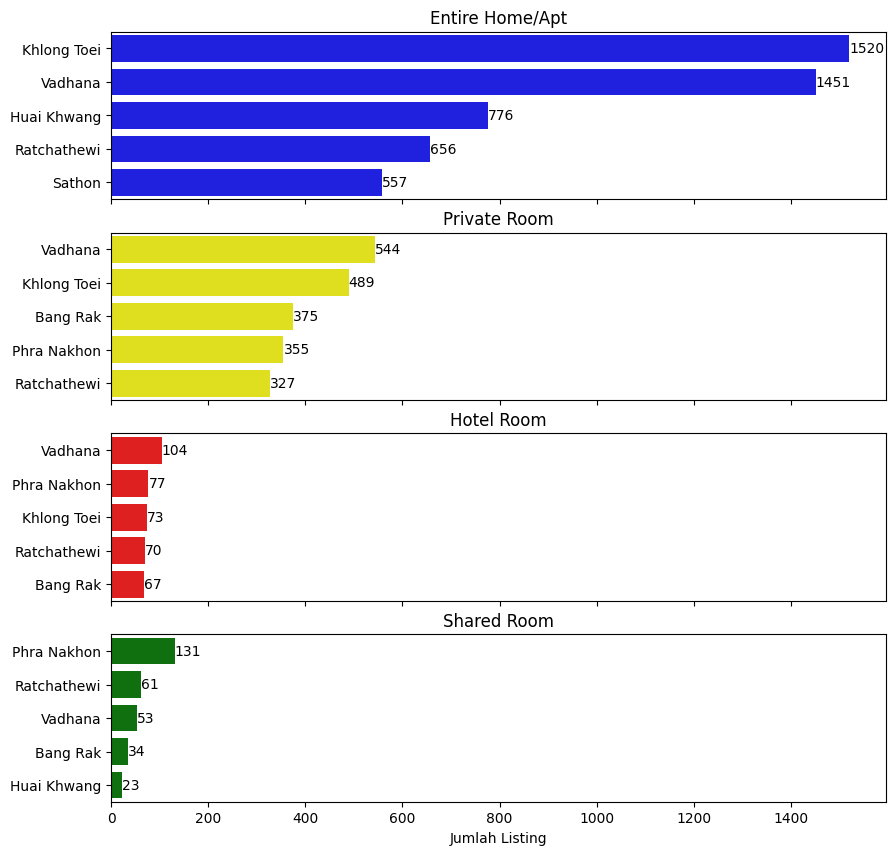

In [12]:
# Grafik jumlah listing
y=5
fig, (ax1, ax2,ax3,ax4) = plt.subplots(nrows=4, sharex=True,figsize=(10, 10))

#Entire home/apt
ax1=plt.subplot(4, 1, 1)
data_eh=data[data["room_type"]=="Entire home/apt"].groupby("neighbourhood",observed=True).agg({"id":"count"}).reset_index().sort_values("id",ascending=False)
data_eh=data_eh[0:y]
data_eh["neighbourhood"]=data_eh["neighbourhood"].astype("object")
ax1=sns.barplot(x=data_eh["id"],y=data_eh["neighbourhood"],color="Blue",)
ax1.set(ylabel='',title="Entire Home/Apt")
for i in ax1.containers:
    ax1.bar_label(i,)


#Private room
ax4=plt.subplot(4, 1, 2)
data_eh=data[data["room_type"]=="Private room"].groupby("neighbourhood",observed=True).agg({"id":"count"}).reset_index().sort_values("id",ascending=False)
data_eh=data_eh[0:y]
data_eh["neighbourhood"]=data_eh["neighbourhood"].astype("object")
ax4=sns.barplot(x=data_eh["id"],y=data_eh["neighbourhood"],color="Yellow")
ax4.set(ylabel='',title="Private Room")
for i in ax4.containers:
    ax4.bar_label(i,)


#Shared room
ax3=plt.subplot(4, 1, 4)
data_eh=data[data["room_type"]=="Shared room"].groupby("neighbourhood",observed=True).agg({"id":"count"}).reset_index().sort_values("id",ascending=False)
data_eh=data_eh[0:y]
data_eh["neighbourhood"]=data_eh["neighbourhood"].astype("object")
ax3=sns.barplot(x=data_eh["id"],y=data_eh["neighbourhood"],color="Green")
ax3.set(ylabel='',xlabel="Jumlah Listing",title="Shared Room")
for i in ax3.containers:
    ax3.bar_label(i,)

#Hotel room
ax2=plt.subplot(4, 1, 3)
data_eh=data[data["room_type"]=="Hotel room"].groupby("neighbourhood",observed=True).agg({"id":"count"}).reset_index().sort_values("id",ascending=False)
data_eh=data_eh[0:y]
data_eh["neighbourhood"]=data_eh["neighbourhood"].astype("object")
ax2=sns.barplot(x=data_eh["id"],y=data_eh["neighbourhood"],color="Red")
ax2.set(ylabel='',xlabel="Jumlah Listing",title="Hotel Room")
for i in ax2.containers:
    ax2.bar_label(i,)

plt.show()

Hasil analisis:
Barchart di atas menunjukkan jumlah listing per room type per neighbourhood yang sudah diurutkan dari jumlah listing terbanyak. Dapat dilihat terdapat jumlah listing yang berbeda secara signifikan antar neighbourhood. Walaupun listing tersebar di 50 disctrict, dari barchart di atas, dapat disimpulkan bahwa ketersediaan suatu room type terkonsentrasi di neighbourhood tertentu. 

In [13]:
# Top 3 Neighbourhood untuk setiap room type
listing_group_s=data[["room_type","neighbourhood","number_of_reviews_ltm","id"]].groupby(["room_type","neighbourhood"],observed=True).agg({"id":"count","number_of_reviews_ltm":"sum"})
listing_group_s=listing_group_s.groupby("room_type",observed=True).apply(lambda x: x.nlargest(3,"id")).reset_index(level=0,drop=True)
listing_group_s.rename(columns={"id":"Jumlah Listing"},inplace=True)
listing_group_s["d_vs_s_current"]=listing_group_s["number_of_reviews_ltm"]/listing_group_s["Jumlah Listing"]
listing_group_s

Jumlah Listing  number_of_reviews_ltm  \
room_type       neighbourhood                                          
Entire home/apt Khlong Toei              1520                  12422   
                Vadhana                  1451                   8692   
                Huai Khwang               776                   2167   
Hotel room      Vadhana                   104                    144   
                Phra Nakhon                77                    152   
                Khlong Toei                73                    190   
Private room    Vadhana                   544                    831   
                Khlong Toei               489                    986   
                Bang Rak                  375                    679   
Shared room     Phra Nakhon               131                     74   
                Ratchathewi                61                     33   
                Vadhana                    53                     42   

                               d_vs_s_current  
room_type       neighbourhood                  
Entire home/apt Khlong Toei          8.172368  
                Vadhana              5.990351  
                Huai Khwang          2.792526  
Hotel room      Vadhana              1.384615  
                Phra Nakhon          1.974026  
                Khlong Toei          2.602740  
Private room    Vadhana              1.527574  
                Khlong Toei          2.016360  
                Bang Rak             1.810667  
Shared room     Phra Nakhon          0.564885  
                Ratchathewi          0.540984  
                Vadhana              0.792453

Hasil Analisis Room Type per Neighbourhood:
1. Top 3 neighbourhood dengan jumlah listing terbanyak untuk setiap room type dapat dilihat pada tabel di atas. 
1. District Vadhana dan Khlong Toei masuk dalam top 3 di hampir seluruh room type. District Vadhana dan Khlong Toie adalah 2 disctrict yang bersebelahan dan dipisahkan oleh Sukhumvit road. Kedua district ini merupakan are modern yang merupakan pusat komersial di bangkok dan ditinggali oleh banyak ekspat.
1. Sedangkan district lain memiliki room type terbanyak sebagai berikut:
    - Huai Khwang : Entire home/apt
    - Phra Nakhon : Hotel room
    - Bang Rak : Private room
    - Ratchathewi : Shared room

Note: kolom d_vs_s_current menunjukkan jumlah current demand dibanding ketersediaan listing

### F1.B. Current Demand Analysis : Popularity of Listing

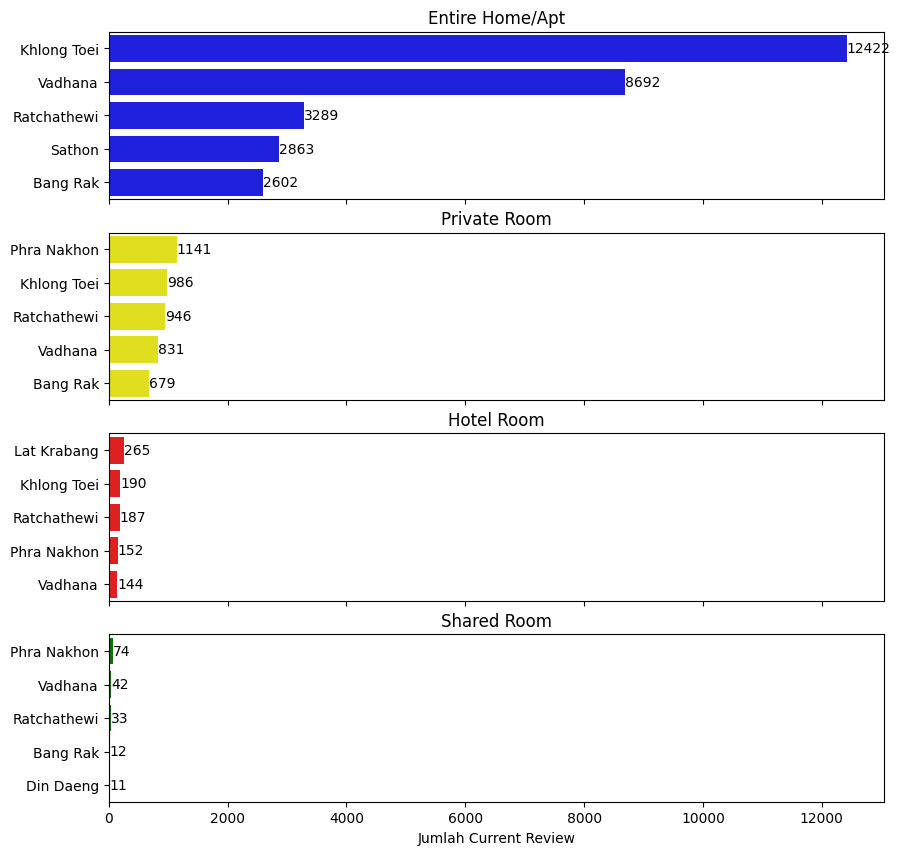

In [14]:
# Grafik jumlah listing
y=5
fig, (ax1, ax2,ax3,ax4) = plt.subplots(nrows=4, sharex=True,figsize=(10, 10))

#Entire home/apt
ax1=plt.subplot(4, 1, 1)
data_eh=data[data["room_type"]=="Entire home/apt"].groupby("neighbourhood",observed=True).agg({"number_of_reviews_ltm":"sum"}).reset_index().sort_values("number_of_reviews_ltm",ascending=False)
data_eh=data_eh[0:y]
data_eh["neighbourhood"]=data_eh["neighbourhood"].astype("object")
ax1=sns.barplot(x=data_eh["number_of_reviews_ltm"],y=data_eh["neighbourhood"],color="Blue",)
ax1.set(ylabel='',title="Entire Home/Apt")
for i in ax1.containers:
    ax1.bar_label(i,)


#Private room
ax4=plt.subplot(4, 1, 2)
data_eh=data[data["room_type"]=="Private room"].groupby("neighbourhood",observed=True).agg({"number_of_reviews_ltm":"sum"}).reset_index().sort_values("number_of_reviews_ltm",ascending=False)
data_eh=data_eh[0:y]
data_eh["neighbourhood"]=data_eh["neighbourhood"].astype("object")
ax4=sns.barplot(x=data_eh["number_of_reviews_ltm"],y=data_eh["neighbourhood"],color="Yellow")
ax4.set(ylabel='',title="Private Room")
for i in ax4.containers:
    ax4.bar_label(i,)


#Shared room
ax3=plt.subplot(4, 1, 4)
data_eh=data[data["room_type"]=="Shared room"].groupby("neighbourhood",observed=True).agg({"number_of_reviews_ltm":"sum"}).reset_index().sort_values("number_of_reviews_ltm",ascending=False)
data_eh=data_eh[0:y]
data_eh["neighbourhood"]=data_eh["neighbourhood"].astype("object")
ax3=sns.barplot(x=data_eh["number_of_reviews_ltm"],y=data_eh["neighbourhood"],color="Green")
ax3.set(ylabel='',xlabel="Jumlah Current Review",title="Shared Room")
for i in ax3.containers:
    ax3.bar_label(i,)

#Hotel room
ax2=plt.subplot(4, 1, 3)
data_eh=data[data["room_type"]=="Hotel room"].groupby("neighbourhood",observed=True).agg({"number_of_reviews_ltm":"sum"}).reset_index().sort_values("number_of_reviews_ltm",ascending=False)
data_eh=data_eh[0:y]
data_eh["neighbourhood"]=data_eh["neighbourhood"].astype("object")
ax2=sns.barplot(x=data_eh["number_of_reviews_ltm"],y=data_eh["neighbourhood"],color="Red")
ax2.set(ylabel='',xlabel="Jumlah Current Review",title="Hotel Room")
for i in ax2.containers:
    ax2.bar_label(i,)

plt.show()

Hasil Analisis: Barchart di atas menunjukkan adanya perbedaan demand antar room type, dimana shared room paling tidak diminati. Selain itu, demand juga terkonsentrasi di neighbourhood tertentu saja untuk setiap room type. Selanjutnya akan dilakukan analisis supply vs current demand

### F1.C. GROWTH ANALYSIS

In [15]:
# Top 3 Current Review: per room type per neighbourhood
listing_group_d=data[["room_type","neighbourhood","number_of_reviews_ltm","id"]].groupby(["room_type","neighbourhood"],observed=True).agg({"number_of_reviews_ltm":"sum","id":"count"})
listing_group_d=listing_group_d.groupby("room_type",observed=True).apply(lambda x: x.nlargest(3,"number_of_reviews_ltm")).reset_index(level=0,drop=True)
listing_group_d.rename(columns={"id":"Jumlah Listing"},inplace=True)
listing_group_d["d_vs_s_current"]=listing_group_d["number_of_reviews_ltm"]/listing_group_d["Jumlah Listing"]
listing_group_d

number_of_reviews_ltm  Jumlah Listing  \
room_type       neighbourhood                                          
Entire home/apt Khlong Toei                    12422            1520   
                Vadhana                         8692            1451   
                Ratchathewi                     3289             656   
Hotel room      Lat Krabang                      265              14   
                Khlong Toei                      190              73   
                Ratchathewi                      187              70   
Private room    Phra Nakhon                     1141             355   
                Khlong Toei                      986             489   
                Ratchathewi                      946             327   
Shared room     Phra Nakhon                       74             131   
                Vadhana                           42              53   
                Ratchathewi                       33              61   

                               d_vs_s_current  
room_type       neighbourhood                  
Entire home/apt Khlong Toei          8.172368  
                Vadhana              5.990351  
                Ratchathewi          5.013720  
Hotel room      Lat Krabang         18.928571  
                Khlong Toei          2.602740  
                Ratchathewi          2.671429  
Private room    Phra Nakhon          3.214085  
                Khlong Toei          2.016360  
                Ratchathewi          2.892966  
Shared room     Phra Nakhon          0.564885  
                Vadhana              0.792453  
                Ratchathewi          0.540984

Hasil Analisis Supply & Current Demand: Listing by Neighbourhood and Room Type

Terdapat perbedaan antara top 3 ketersediaan listing dengan top 3 current review. Perbedaan ini mengindikasikan masih adanya peluang bisnis.

|Peluang Bisnis Berkembang|
|---|
|Hotel room di Lat Krabang|
|Entire home/apt di Khlong Tei, Vadhana dan Ratchathewi|
|Private room di Phra Nakhon|

### F1.D. SUSTAINABILITY ANALYSIS

In [16]:
# Statistik Number of Reviews Per Room Type
price_desc=data[["number_of_reviews","room_type","neighbourhood"]].groupby("room_type",observed=True,as_index=True)
price_desc.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

number_of_reviews                                              \
                            count       mean        std  min  25%  50%    75%   
room_type                                                                       
Entire home/apt            8912.0  22.210839  45.291144  0.0  0.0  5.0  23.00   
Hotel room                  648.0  19.598765  54.639152  0.0  0.0  2.0  13.25   
Private room               5770.0   8.788562  29.728494  0.0  0.0  0.0   4.00   
Shared room                 523.0   5.128107  15.898409  0.0  0.0  0.0   2.00   

                                               
                  90%     95%     99%     max  
room_type                                      
Entire home/apt  65.0  103.00  218.00  1224.0  
Hotel room       46.9   90.00  316.12   486.0  
Private room     19.0   46.55  138.31   807.0  
Shared room      12.0   28.80   83.56   153.0

Hasil Analisis Number of Reviews by Roomtype
1. Sedikitnya 50% listing untuk private room dan shared room belum pernah disewa melalui airbnb
1. Sedikitnya 25% listing untuk entire home/apt dan hotel room belum pernah disewa melalui airbnb
1. Listing yang belum pernah disewa pada poin 1 dan 2 dapat terjadi karena banyak faktor kemungkinan, diantaranya:
    - Pemilihan room type yang kurang tepat / tidak diminati di neighbourhood tertentu
    - Persaingan dengan listing lain di room type dan neighbourhood yang sama
    - Harga yang kurang bersaing
    - Disewa melalui platform lain (availability_365=0 walaupun tidak ada review)
1. Berdasarkan komparasi nilai maximum terhadap nilai percentile 99%, dapat disimpulkan bahwa terdapat listing favorit pelanggan untuk room type entire home/apt dan Private room, yaitu listing yang memiliki nilai maximum jumlah review > 2 kali lipat dari nilai percentile ke 99%

In [17]:
# Top 3 Overall Review: per room type per neighbourhood
listing_group_d=data[["room_type","neighbourhood","number_of_reviews","id","number_of_reviews_ltm"]].groupby(["room_type","neighbourhood"],observed=True).agg({"number_of_reviews":"sum","id":"count","number_of_reviews_ltm":"sum"})
listing_group_d=listing_group_d.groupby("room_type",observed=True).apply(lambda x: x.nlargest(3,"number_of_reviews")).reset_index(level=0,drop=True)
listing_group_d.rename(columns={"id":"Jumlah Listing"},inplace=True)
listing_group_d["d_vs_s_overal"]=listing_group_d["number_of_reviews"]/listing_group_d["Jumlah Listing"]
listing_group_d

number_of_reviews  Jumlah Listing  \
room_type       neighbourhood                                      
Entire home/apt Khlong Toei                34377            1520   
                Vadhana                    32536            1451   
                Sathon                     19566             557   
Hotel room      Khlong Toei                 4249              73   
                Ratchathewi                 2168              70   
                Phra Nakhon                 1113              77   
Private room    Phra Nakhon                 5040             355   
                Ratchathewi                 3996             327   
                Huai Khwang                 3940             301   
Shared room     Ratchathewi                  536              61   
                Phra Nakhon                  480             131   
                Vadhana                      456              53   

                               number_of_reviews_ltm  d_vs_s_overal  
room_type       neighbourhood                                        
Entire home/apt Khlong Toei                    12422      22.616447  
                Vadhana                         8692      22.423156  
                Sathon                          2863      35.127469  
Hotel room      Khlong Toei                      190      58.205479  
                Ratchathewi                      187      30.971429  
                Phra Nakhon                      152      14.454545  
Private room    Phra Nakhon                     1141      14.197183  
                Ratchathewi                      946      12.220183  
                Huai Khwang                      385      13.089701  
Shared room     Ratchathewi                       33       8.786885  
                Phra Nakhon                       74       3.664122  
                Vadhana                           42       8.603774

Hasil Analisis Supply & Overall Demand: Listing by Neighbourhood

Walaupun bukan top 3 untuk current review, terdapat bisnis yang sustain dalam jangka panjang. Dilihat dari total overal review yang tinggi dan current review yang tidak kalah saing dengan top 3 current review.
|Bisnis yang Sustain|
|---|
|Entire home/apt di Sathon|
|Hotel room di Phra Nakhon|
|Private room di Huai Khwang|


In [18]:
# List room type di suatu neighbourhood yang belum pernah memiliki penyewa
price_desc=data[(data["availability_365"]>0)]
price_desc=price_desc[["room_type","neighbourhood","id","number_of_reviews"]].groupby(["room_type","neighbourhood"],observed=True,as_index=True).agg({"id":"count","number_of_reviews":"sum"})
price_desc.rename(columns={"id":"Jumlah Listing"},inplace=True)
price_desc=price_desc[(price_desc["number_of_reviews"]==0)]
price_desc

Jumlah Listing  number_of_reviews
room_type       neighbourhood                                     
Entire home/apt Nong Khaem                    2                  0
                Thawi Watthana                4                  0
Hotel room      Bangkok Yai                   3                  0
                Chatu Chak                    2                  0
                Phasi Charoen                 1                  0
Private room    Bang Bon                      3                  0
Shared room     Bang Khen                     1                  0
                Bang Khun thain               2                  0
                Bang Sue                      3                  0
                Chom Thong                    1                  0
                Lat Phrao                     2                  0
                Min Buri                      1                  0
                Phasi Charoen                 1                  0
                Saphan Sung                   1                  0
                Wang Thong Lang               3                  0
                Yan na wa                     3                  0

Hasil analisis room type yang tidak diminati di suatu neighbourhood:

Tabel di atas menunjukkan room type yang sama sekali belum pernah direview di suatu neighbourhood walaupun tempat tinggal tersedia (availability 365>0). Selanjutnya akan diextract seluruh neighbourhood pada tabel di atas dan akan dianalisis lebih lanjut apakah di neighbourhood tersebut terdapat room type yang lebih diminati.

In [19]:
# Perbandingan jumlah review untuk setiap room_type di setiap neighbourhood
price_desc_z=price_desc.reset_index()
price_desc_z_list=list(price_desc_z["neighbourhood"])
price_desc_z_list=data[data["neighbourhood"].isin(price_desc_z_list)]
price_desc_z_list[["number_of_reviews","room_type","neighbourhood"]].groupby(["room_type","neighbourhood"],observed=True,as_index=True).agg({"number_of_reviews":"sum"}).transpose().stack(future_stack=True)

room_type                          Entire home/apt  Hotel room  Private room  \
                  neighbourhood                                                
number_of_reviews Bang Bon                       1         NaN             0   
                  Bang Khen                    555         9.0           170   
                  Bang Khun thain               97         NaN             5   
                  Bang Sue                    3674         NaN           294   
                  Bangkok Yai                  588         0.0           169   
                  Chatu Chak                  5782         0.0          2434   
                  Chom Thong                   811         NaN           229   
                  Lat Phrao                    132         NaN            23   
                  Min Buri                     101         NaN            46   
                  Nong Khaem                     0         NaN             1   
                  Phasi Charoen               1148         0.0           286   
                  Saphan Sung                   44         NaN            89   
                  Thawi Watthana                 4         NaN             7   
                  Wang Thong Lang               78         NaN            80   
                  Yan na wa                   1429       138.0          1380   

room_type                          Shared room  
                  neighbourhood                 
number_of_reviews Bang Bon                 NaN  
                  Bang Khen                0.0  
                  Bang Khun thain          0.0  
                  Bang Sue                 0.0  
                  Bangkok Yai              1.0  
                  Chatu Chak               2.0  
                  Chom Thong               0.0  
                  Lat Phrao                0.0  
                  Min Buri                 0.0  
                  Nong Khaem               NaN  
                  Phasi Charoen            0.0  
                  Saphan Sung              0.0  
                  Thawi Watthana           NaN  
                  Wang Thong Lang          0.0  
                  Yan na wa                0.0

Rekomendasi:

Berdasarkan observasi data di atas, room type per neighbourhood yang belum memiliki review sebagian besar merupakan shared room. Sedangkan dapat dilihat bahwa peminat private room di neighbourhood yang sama cukup tinggi. Host dapat disarankan untuk mengubah shared room menjadi private room apabila memungkinkan.|

In [20]:
data.nlargest(2,"number_of_reviews")

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3737,20869092,Beautiful One Bedroom Apartment Near Skytrain,116193397,Suchada,Phaya Thai,13.77369,100.54079,Entire home/apt,1571,3,1224,2022-12-16,19.13,1,310,109
6586,31077175,FREE PICK UP⭐BKK AIRPORT/BREAKFAST/PRIVATE DELUXE,158545122,Pailin,Lat Krabang,13.72132,100.76495,Private room,1032,1,807,2022-12-12,16.62,3,348,146


Terdapat 2 listing yang paling diminati, yaitu:
- Entire home/apt: Beautiful One Bedroom Apartment Near Skytrain yang dikelola oleh Suchada dan terletak di Phaya Thai
- Private room: FREE PICK UP⭐BKK AIRPORT/BREAKFAST/PRIVATE DELUXE yang dikelola oleh Pailin dan terletak di Lat Krabang

### F2.A. Supply Analysis : Price

In [21]:
# Statistik Harga Per Room Type
price_desc=data[["price","room_type"]].groupby("room_type",observed=True,as_index=True).describe(percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])
price_desc

price                                                     \
                  count         mean           std    min      25%     50%   
room_type                                                                    
Entire home/apt  8912.0  3465.474529  30076.447369  332.0  1028.00  1536.0   
Hotel room        648.0  3032.983025  12024.550798  318.0   995.75  1700.0   
Private room     5770.0  3064.603640  17295.872058  278.0   800.00  1212.0   
Shared room       523.0   919.757170   2147.960499  280.0   390.00   500.0   

                                                                         
                     75%      85%     90%      95%       99%        max  
room_type                                                                
Entire home/apt  2571.00  3500.00  4469.9  6679.00  17861.36  1100000.0  
Hotel room       3170.75  4427.55  5430.0  7383.60  15348.47   300000.0  
Private room     2092.00  3008.45  4000.0  7008.25  20000.00   600700.0  
Shared room       650.00   984.00  1300.0  2387.60  11510.00    31200.0

Hasil Analisis Harga per Room Type:

Berdasarkan deskripsi statistik dari harga per room type di atas, harga untuk setiap room type cenderung bervariasi. Artinya, terdapat faktor lain di luar variable room type yang menyebabkan perbedaan harga, misalnya harga bengantung juga dengan neighbourhood.

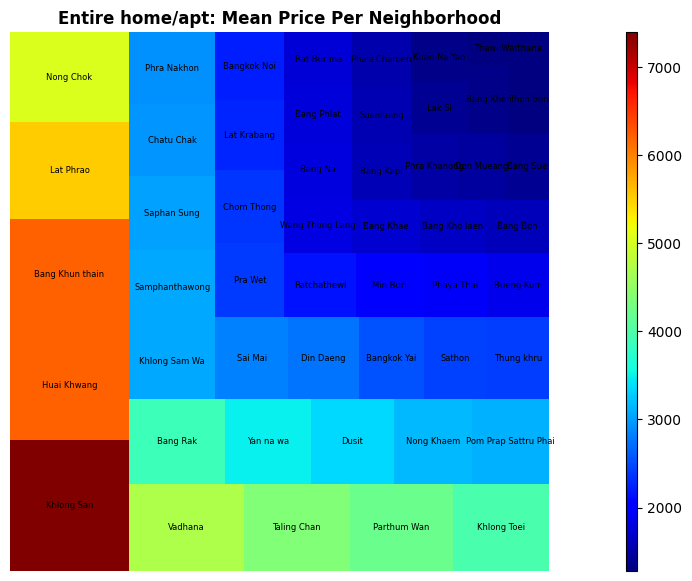

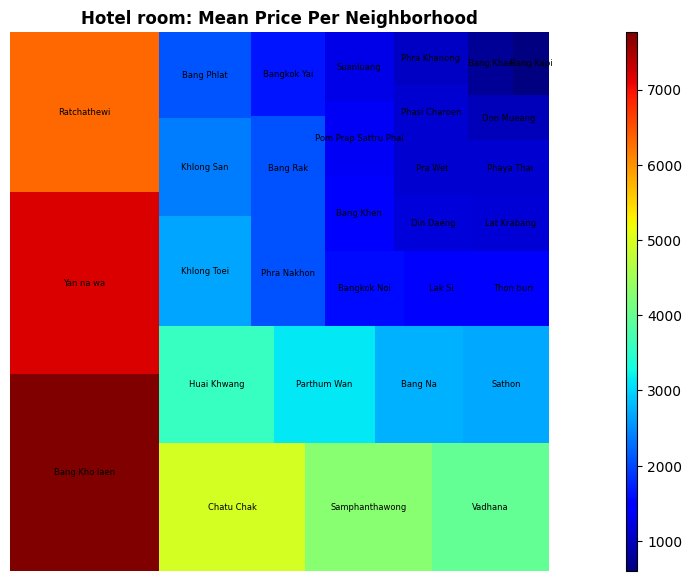

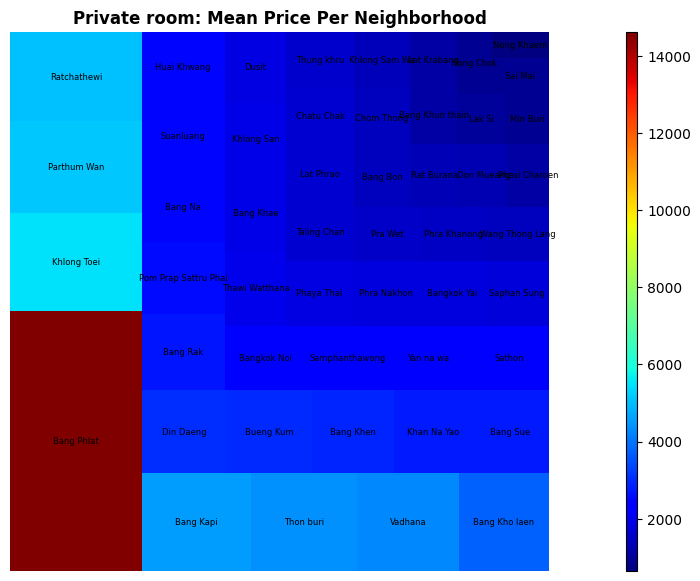

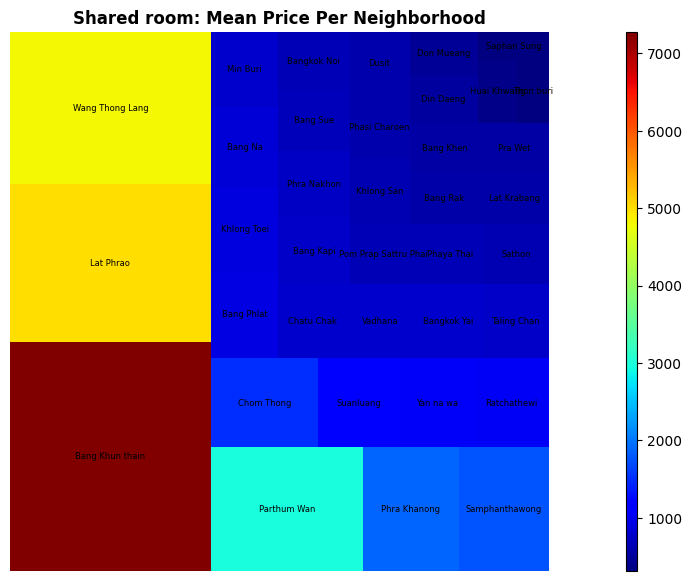

In [22]:
# Rata-rata Harga Per Neighbourhood : Entire home/apt
def plp(room):
    price_neighbor=data.loc[data["room_type"]==room,["price","neighbourhood"]].groupby("neighbourhood",observed=True,as_index=False).mean().sort_values(by="price",ascending=False)
    cmap = matplotlib.cm.jet
    norm = matplotlib.colors.Normalize(vmin=min(price_neighbor["price"]), vmax=max(price_neighbor["price"]))
    colors = [cmap(norm(value)) for value in price_neighbor["price"]]

    fig = plt.figure(figsize=(20, 7))
    ax=squarify.plot(price_neighbor["price"], label=price_neighbor["neighbourhood"],color=colors,text_kwargs={'fontsize':6,'color':"black"}) 
    ax.set_title(f"{room}: Mean Price Per Neighborhood",weight="bold")
    ax.set_axis_off()
    img = plt.imshow([price_neighbor["price"]], cmap=cmap)
    fig.colorbar(img, orientation="vertical", shrink=1,aspect=50)

plp("Entire home/apt")
plp("Hotel room")
plp("Private room")
plp("Shared room")

In [23]:
# Percentiles per roomtype per neighbourhood
price_desc=data[["price","room_type","neighbourhood"]].groupby(["room_type","neighbourhood"],observed=True,as_index=True).describe(percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99]).xs(axis=1,drop_level=1,key="price")
price_desc.groupby("room_type",observed=True).apply(lambda x: x.nlargest(3,"mean")).reset_index(level=0,drop=True)

count          mean           std     min  \
room_type       neighbourhood                                                
Entire home/apt Khlong San       186.0   7395.768817  53419.249544   450.0   
                Huai Khwang      776.0   6222.608247  62232.198287   443.0   
                Bang Khun thain    7.0   6210.714286   7750.705016   650.0   
Hotel room      Bang Kho laen      2.0   7765.000000   9708.576106   900.0   
                Yan na wa          8.0   7183.125000   5010.874387   990.0   
                Ratchathewi       70.0   6317.500000  35649.634060   400.0   
Private room    Bang Phlat        76.0  14616.894737  82110.396367   346.0   
                Khlong Toei      489.0   5481.063395  27650.065532   360.0   
                Parthum Wan      140.0   5154.557143  25353.254569   350.0   
Shared room     Bang Khun thain    2.0   7276.000000   9299.868386   700.0   
                Lat Phrao          2.0   5000.000000      0.000000  5000.0   
                Wang Thong Lang    3.0   4816.666667   6683.250207   350.0   

                                    25%     50%      75%       85%      90%  \
room_type       neighbourhood                                                 
Entire home/apt Khlong San       1148.5  1474.5   2500.0   3605.00   5036.0   
                Huai Khwang      1000.0  1375.0   2216.0   3248.25   3843.0   
                Bang Khun thain  1025.0  2057.0   8450.0  11181.80  14727.2   
Hotel room      Bang Kho laen    4332.5  7765.0  11197.5  12570.50  13257.0   
                Yan na wa        2866.0  7943.0   9393.0  11773.00  12933.0   
                Ratchathewi       986.0  1504.5   2525.0   3785.25   5245.2   
Private room    Bang Phlat        610.5   900.0   1222.5   2132.75   3340.0   
                Khlong Toei       999.0  1497.0   2700.0   4251.80   7314.4   
                Parthum Wan      1337.5  2000.0   3330.0   5000.00   5660.4   
Shared room     Bang Khun thain  3988.0  7276.0  10564.0  11879.20  12536.8   
                Lat Phrao        5000.0  5000.0   5000.0   5000.00   5000.0   
                Wang Thong Lang   975.0  1600.0   7050.0   9230.00  10320.0   

                                      95%        99%        max  
room_type       neighbourhood                                    
Entire home/apt Khlong San        8018.25   69399.35   710760.0  
                Huai Khwang       5624.75   18500.00  1000000.0  
                Bang Khun thain  18272.60   21108.92    21818.0  
Hotel room      Bang Kho laen    13943.50   14492.70    14630.0  
                Yan na wa        14088.00   15012.00    15243.0  
                Ratchathewi       5816.50   98644.89   300000.0  
Private room    Bang Phlat        8053.00  450712.75   600700.0  
                Khlong Toei      12514.60   64800.00   372227.0  
                Parthum Wan       7330.95   25829.64   300000.0  
Shared room     Bang Khun thain  13194.40   13720.48    13852.0  
                Lat Phrao         5000.00    5000.00     5000.0  
                Wang Thong Lang  11410.00   12282.00    12500.0

Secara keseluruhan data, mean price tertinggi untuk setiap room type adalah sebagai berikut:
1. Room type Entire home/apt di kisaran 6000-7000 dan berada di neighborhood:
   - Khlong San (7395)
   - Huai Khwang (6222)
   - Bang Khun Thain (6210)
1. Room type Hotel room di kisaran 6000-7000 dan berada di neighborhood:
    - Bhank Ko Laen (7765)
    - Yan Na Wa (7183)
    - Ratchathewi (6317)
1. Room type Private room di kisaran 5000-14000 di neighborhood:
    - Bang Phlat  (14616)
    - Khlong Toei (5481)
    - Parthum Wan (5154)
1. Room type Shared room di kisaran 4000-7000 di neighborhood:
    - Bang Khun Thain (7276)
    - Lat Phrao (5000)
    - Wang Thong Lang (4816)

Note: Private room di Bang Phlat dari sisi harga perlu dianalisis lebih lanjut karena mean price jauh berbeda dengan neighbourhood lainnya


Karena harga bervariasi terhadap room type dan neighbourhood, maka agar analisis lebih akurat, perlu dibuat kategori harga / *suply-based price category untuk setiap room type dan setiap neighbourhood* sebagai berikut:
   - Normal: Harga <= percentile 50
   - High : percentile 50 <= Harga < percentile 75
   - Very High : percentile 75 <= Harga < percentile 85
   - Expensive : percentile 85 <= Harga < percentile 95
   - Very Expensive : percentile 95 <= Harga < percentile 99
   - Luxury : Harga >= percentile 99

Suply-based price category: Threshold category dihitung berdasarkan keseluruhan data listing yang tersedia tanpa melihat jumlah review

In [24]:
# Pembuatan Price category per room type per neighbourhood
percentiles=price_desc[["50%","75%","85%","90%","95%","99%"]].reset_index()
data=pd.merge(data,percentiles,on=["room_type","neighbourhood"],how="left")
data.loc[data["price"]<=data["50%"],"Price_Category_sb"]="Normal"
data.loc[(data["price"]<=data["75%"]) & (data["price"]>data["50%"]),"Price_Category_sb"]="High"
data.loc[(data["price"]<=data["85%"]) & (data["price"]>data["75%"]),"Price_Category_sb"]="Very High"
data.loc[(data["price"]<=data["95%"]) & (data["price"]>data["85%"]),"Price_Category_sb"]="Expensive"
data.loc[(data["price"]<=data["99%"]) & (data["price"]>data["95%"]),"Price_Category_sb"]="Very Expensive"
data.loc[(data["price"]>data["99%"]),"Price_Category_sb"]="Luxury"

In [25]:
# Analisis Lanjutan : Private Room - Bang Phlat - Very Expensive & Luxury
data_bangp=data[(data["neighbourhood"]=="Bang Phlat") & (data["room_type"]=="Private room") & ((data["Price_Category_sb"]=="Luxury") | (data["Price_Category_sb"]=="Very Expensive"))]
data_bangp.loc[:,["id","name","host_id","host_name","number_of_reviews","number_of_reviews_ltm","price","availability_365","last_review"]]

,id,name,host_id,host_name,number_of_reviews,number_of_reviews_ltm,price,availability_365,last_review
4373,22633450,rm 1 : cozy & comfy,117057915,Jeab,9,0,600700,330,2020-01-26
11000,43749830,Junior Suite Room,163514932,Praya Palazzo,0,0,9130,274,NaT
11001,43749896,Chao Praya Suite Room,163514932,Praya Palazzo,0,0,13840,241,NaT
12791,629653142142561774,rm 6 : bright morning sunlight.,117057915,Jeab,0,0,400717,241,NaT


Hasil Analisis Private Room Bang Phlat:

Terdapat 2 listing dengan tipe private room di Bang Phlat yang jauh di atas harga pasar, yaitu id 22633450 dan id 629653142142561774 yang keduanya milik host Jeab dengan host_id 117057915. Sistem perlu memberikan notifikasi pemberitahuan apabila terdapat harga yang tidak wajar. Sehingga apabila terjadi kesalahan, host dapat segera melakukan review harga

### F2.B. Current Demand Analysis : Price

In [26]:
# Harga Per Room Type: Current Reviews
price_desc=data.loc[data["number_of_reviews_ltm"]>0,["price","room_type"]].groupby("room_type",observed=True,as_index=True).describe(percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])
price_desc

price                                                     \
                  count         mean           std    min      25%     50%   
room_type                                                                    
Entire home/apt  4885.0  2425.486182  14725.583572  346.0  1070.00  1563.0   
Hotel room        192.0  2196.526042   2555.734355  350.0   995.75  1493.5   
Private room     1482.0  1668.520918   2119.905706  304.0   750.00  1037.0   
Shared room        75.0   448.760000    120.633221  295.0   380.50   416.0   

                                                                       
                     75%     85%     90%     95%       99%        max  
room_type                                                              
Entire home/apt  2500.00  3394.8  4004.2  5584.6  11153.28  1014758.0  
Hotel room       2329.00  3199.0  3974.8  6176.0   9728.02    24390.0  
Private room     1699.75  2355.8  3228.4  4482.2  11424.13    26338.0  
Shared room       478.50   500.0   571.0   637.1    881.00     1029.0

Hasil Analisis Demand Harga:
Berikut adalah perbandingan dari nilai mean dan max untuk keseluruhan listing vs listing yang memiliki review di 12 bulan terakhir

|Room Type|Mean Supply Based|Mean Demand Based|Max Supply Based|Max Demand Based|
|---|---|---|---|---|
|Entire home/apt|3,465.5 |2,425.5|1,100,000 |1,014,758|
|Hotel room|3,033 |2,196.5|300,000|24,390|
|Private room|3,064.6 |1,669.4|600,700|26,338|
|Shared room|919.8|448.76|31,200|1,029|

Dapat dilihat bahwa terdapat harga yang timpang antara listing yang tersedia dengan demand dari pelanggan. Mean dan Max demand based menggambarkan rentang harga yang dapat diterima oleh pelanggan. 

Untuk memperoleh gambaran detil harga yang masih dapat diterima oleh pelanggan, maka akan dibentuk Demand-Based Price Category. Berbeda dengan Supply-Based Price Category, Threshold dari Demand-Based Price Category dibentuk hanya berdasarkan data yang memiliki review dalam 12 bulan terakhir.

In [27]:
# Percentiles per roomtype per neighbourhood: price demand
price_desc=data.loc[data["number_of_reviews_ltm"]>0,["price","room_type","neighbourhood"]].groupby(["room_type","neighbourhood"],observed=True,as_index=True).describe(percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99]).xs(axis=1,drop_level=1,key="price")
price_desc.groupby("room_type",observed=True).apply(lambda x: x.nlargest(3,"mean")).reset_index(level=0,drop=True)

count         mean           std  \
room_type       neighbourhood                                            
Entire home/apt Bang Khun thain         3.0  8175.000000  11836.109961   
                Lat Phrao               9.0  5081.000000   4882.916265   
                Vadhana               897.0  4185.807135  34053.957124   
Hotel room      Pom Prap Sattru Phai    1.0  6014.000000           NaN   
                Vadhana                23.0  4856.304348   4928.123010   
                Yan na wa               2.0  4366.500000   4775.092093   
Private room    Yan na wa              20.0  3233.000000   5779.720591   
                Suanluang              27.0  3053.740741   6085.309287   
                Bang Kho laen           4.0  2803.500000   4070.765161   
Shared room     Chatu Chak              1.0   829.000000           NaN   
                Parthum Wan             3.0   629.666667    352.846048   
                Samphanthawong          1.0   620.000000           NaN   

                                         min      25%     50%       75%  \
room_type       neighbourhood                                             
Entire home/apt Bang Khun thain        650.0  1353.50  2057.0  11937.50   
                Lat Phrao              365.0  1300.00  3000.0   9514.00   
                Vadhana                350.0  1450.00  2013.0   3394.00   
Hotel room      Pom Prap Sattru Phai  6014.0  6014.00  6014.0   6014.00   
                Vadhana                859.0  1956.50  3720.0   6451.50   
                Yan na wa              990.0  2678.25  4366.5   6054.75   
Private room    Yan na wa              700.0   900.00   990.0   1190.00   
                Suanluang              520.0   682.50   890.0   1283.00   
                Bang Kho laen          590.0   620.00   862.0   3045.50   
Shared room     Chatu Chak             829.0   829.00   829.0    829.00   
                Parthum Wan            360.0   430.00   500.0    764.50   
                Samphanthawong         620.0   620.00   620.0    620.00   

                                           85%      90%       95%       99%  \
room_type       neighbourhood                                                 
Entire home/apt Bang Khun thain       15889.70  17865.8  19841.90  21422.78   
                Lat Phrao              9868.40  10795.6  12472.80  13814.56   
                Vadhana                5000.00   5703.4   7787.20  14477.76   
Hotel room      Pom Prap Sattru Phai   6014.00   6014.0   6014.00   6014.00   
                Vadhana                7623.00   8169.0   8783.40  20968.78   
                Yan na wa              6730.05   7067.7   7405.35   7675.47   
Private room    Yan na wa              2740.15  11673.0  15010.85  20602.17   
                Suanluang              1906.40   7823.2  16176.60  23984.48   
                Bang Kho laen          5387.30   6558.2   7729.10   8665.82   
Shared room     Chatu Chak              829.00    829.0    829.00    829.00   
                Parthum Wan             870.30    923.2    976.10   1018.42   
                Samphanthawong          620.00    620.0    620.00    620.00   

                                            max  
room_type       neighbourhood                    
Entire home/apt Bang Khun thain         21818.0  
                Lat Phrao               14150.0  
                Vadhana               1014758.0  
Hotel room      Pom Prap Sattru Phai     6014.0  
                Vadhana                 24390.0  
                Yan na wa                7743.0  
Private room    Yan na wa               22000.0  
                Suanluang               26338.0  
                Bang Kho laen            8900.0  
Shared room     Chatu Chak                829.0  
                Parthum Wan              1029.0  
                Samphanthawong            620.0

In [28]:
# Pembuatan Price category
percentiles=price_desc[["50%","75%","85%","90%","95%","99%"]].reset_index()
data.drop(["50%","75%","85%","90%","95%","99%"],axis="columns",inplace=True)
data=pd.merge(data,percentiles,on=["room_type","neighbourhood"],how="left")
data.loc[data["price"]<=data["50%"],"Price_Category_db"]="Normal"
data.loc[(data["price"]<=data["75%"]) & (data["price"]>data["50%"]),"Price_Category_db"]="High"
data.loc[(data["price"]<=data["85%"]) & (data["price"]>data["75%"]),"Price_Category_db"]="Very High"
data.loc[(data["price"]<=data["95%"]) & (data["price"]>data["85%"]),"Price_Category_db"]="Expensive"
data.loc[(data["price"]<=data["99%"]) & (data["price"]>data["95%"]),"Price_Category_db"]="Very Expensive"
data.loc[(data["price"]>data["99%"]),"Price_Category_db"]="Luxury"
data.drop(["50%","75%","85%","90%","95%","99%"],axis="columns",inplace=True)

In [29]:
# Persentase penetrasi bisnis untuk setiap Demand Based Price Category
data.loc[data["number_of_reviews_ltm"]>0,"review_ltm_tag"]="Rented"
data.loc[data["number_of_reviews_ltm"]==0,"review_ltm_tag"]="Not Yet Rented"

penet=data[["id","Price_Category_db","review_ltm_tag"]].groupby(["Price_Category_db","review_ltm_tag"],observed=True).count()
penet=pd.DataFrame(penet.unstack(level=0).transpose().to_records())
penet["penetration"]=penet["Rented"]/(penet["Not Yet Rented"]+penet["Rented"])
penet.drop("level_0",axis=1,inplace=True)
penet.sort_values(['penetration'],ascending=False).reset_index(drop=True)

,Price_Category_db,Not Yet Rented,Rented,penetration
0,Normal,3599,3393,0.485269
1,High,1842,1616,0.467322
2,Very High,936,637,0.404959
3,Expensive,1109,616,0.357101
4,Very Expensive,513,232,0.311409
5,Luxury,1027,140,0.119966


Text(0.5, 1.0, 'Penetration by Demand-Based Price Category')

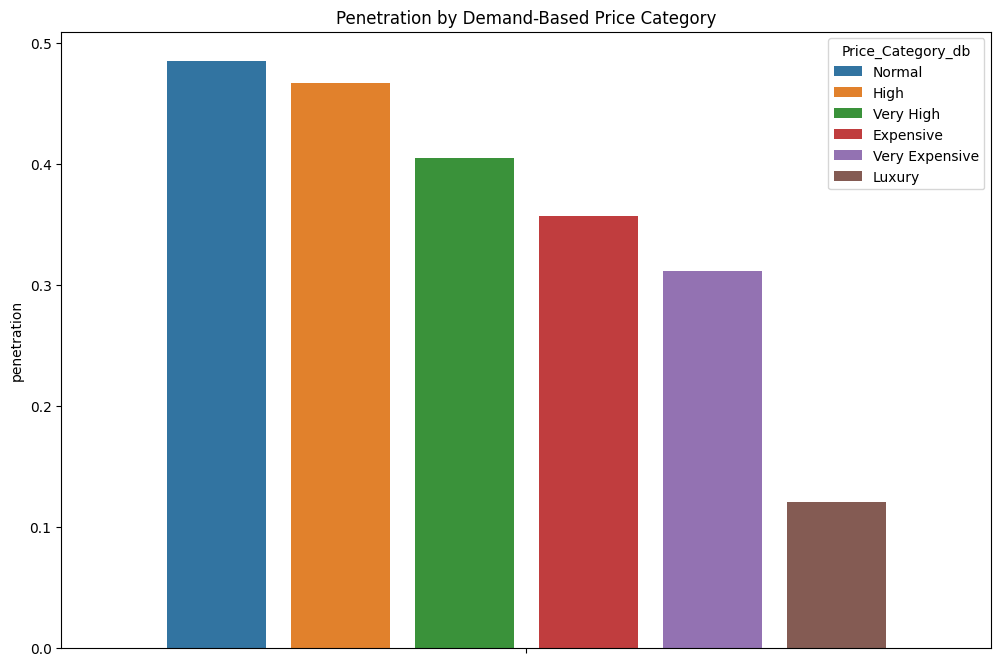

In [30]:
plt.figure(figsize=(12,8))
sns.barplot(data=penet,y="penetration",hue="Price_Category_db",hue_order=["Normal","High","Very High","Expensive","Very Expensive","Luxury"],gap=0.2)
plt.title("Penetration by Demand-Based Price Category")

Selanjutnya akan dianalisis korelasi antar price dengan current review dalam 12 bulan terakhir. 
- Data Price tidak memenuhi asumsi distribusi normal karena data bersifat long tailed (terdapat data dengan severitas / nilai price tinggi namun frekuensinya rendah). 
- Data price tidak memenuhi asumsi distribusi normal, sehingga uji korelasi akan dilakukan menggunakan korelasi spearman

Korelasi akan ditinjau per Room Type dan per Price Category

In [31]:
corr = stats.spearmanr(data.loc[data["Price_Category_db"]!="Luxury","price"], data.loc[data["Price_Category_db"]!="Luxury","number_of_reviews_ltm"])
corr

SignificanceResult(statistic=0.094120426727683, pvalue=2.9451181436303666e-30)

Korelasi untuk price category Normal adalah sebesar: 0.15523652799473453
Korelasi untuk price category High adalah sebesar: 0.1667339468841777
Korelasi untuk price category Very High adalah sebesar: 0.22069064786176476
Korelasi untuk price category Expensive adalah sebesar: 0.20320856173610086
Korelasi untuk price category Very Expensive adalah sebesar: 0.2123962395300923
Korelasi untuk price category Luxury adalah sebesar: 0.046016256013955883


SignificanceResult(statistic=0.046016256013955883, pvalue=0.38871110010162446)

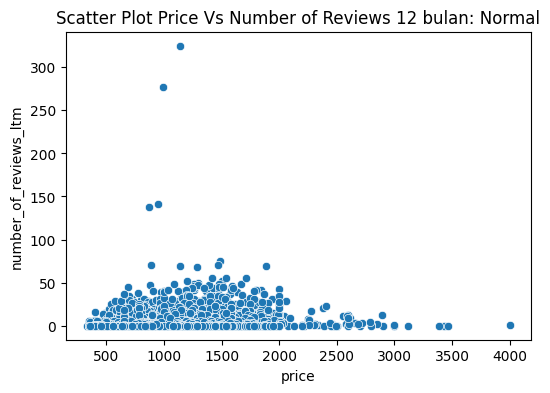

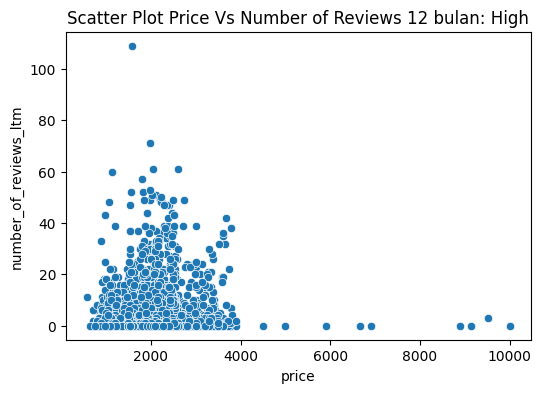

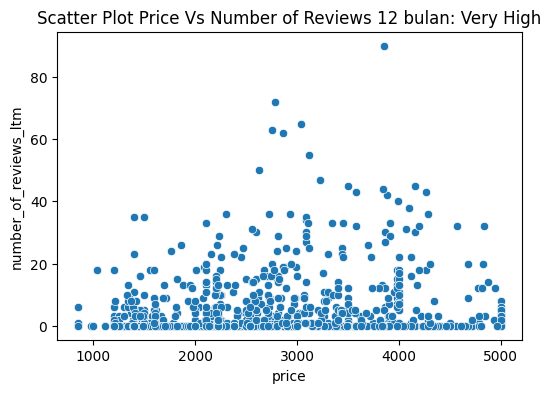

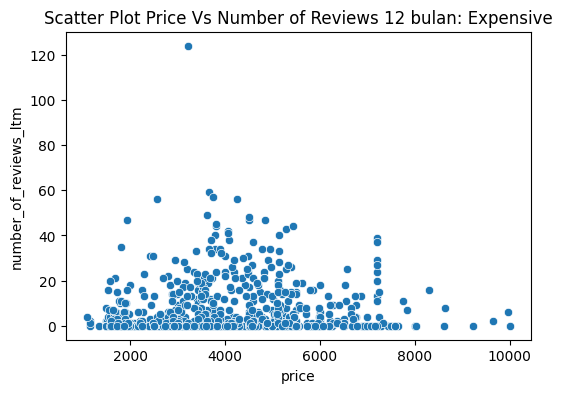

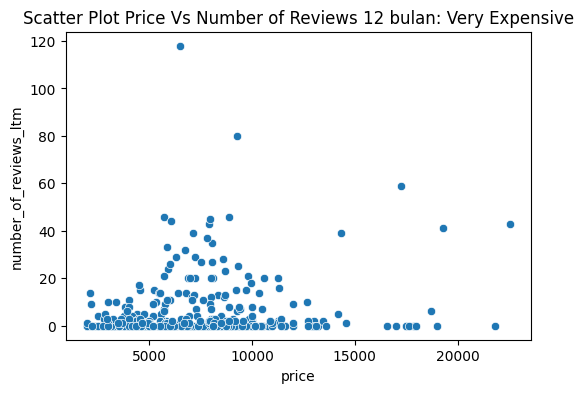

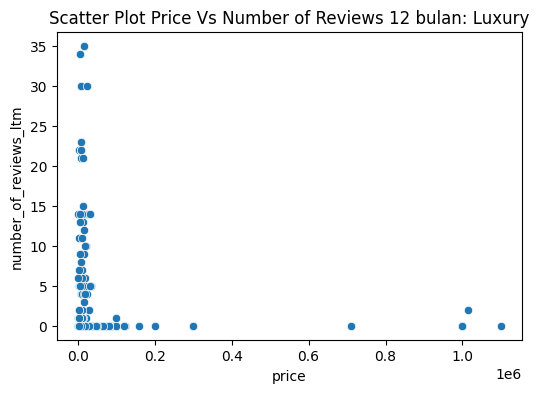

In [32]:
def cor(price_cat):
    data1=data.loc[(data["Price_Category_db"]==price_cat) & (data["room_type"]=="Entire home/apt")]
    corr1= stats.spearmanr(data1["price"], data1["number_of_reviews_ltm"])
    print(f"Korelasi untuk price category {price_cat} adalah sebesar: {corr1.statistic}")

    #Scatter Plot
    plt.figure(figsize=(6,4))
    sns.scatterplot(data1,x="price",y="number_of_reviews_ltm")
    plt.title(f"Scatter Plot Price Vs Number of Reviews 12 bulan: {price_cat}")
    return corr1

cor("Normal")
cor("High")
cor("Very High")
cor("Expensive")
cor("Very Expensive")
cor("Luxury")

Berdasarkan bar chart di atas, dapat dilihat bahwa semakin tinggi harga, maka tingkat penetrasi pasar (peluang listing memperoleh penyewa) semakin rendah. Jika ingin mengejar volume transaksi, maka sebaiknya memperbanyak listing dengan Demand-Based Price Category Normal hingga High.

Walaupun secara penetrasi pasar harga mempengaruhi, namun dari sisi jumlah review tidak terlalu mempengaruhi (korelasi lemah). Hal ini mengindikasikan bahwa penyewa cenderung mencoba tempat tinggal yang memiliki harga normal hingga high, namun tidak menentukan keputusannya untuk menginap di tempat yang sama.

# G. Summary

1. Walaupun listing tersebar di 50 disctrict, ketersediaan suatu room type terkonsentrasi di neighbourhood tertentu. 
2. Terdapat perbedaan demand antar room type, dimana shared room paling tidak diminati. Apabila memungkinkan, host dapat mengubah shared room menjadi private room. Selain itu, demand juga terkonsentrasi di neighbourhood tertentu saja untuk setiap room type.
3. Terdapat 2 listing yang paling diminati, yaitu:
    - Entire home/apt: Beautiful One Bedroom Apartment Near Skytrain yang dikelola oleh Suchada dan terletak di Phaya Thai
    - Private room: FREE PICK UP⭐BKK AIRPORT/BREAKFAST/PRIVATE DELUXE yang dikelola oleh Pailin dan terletak di Lat Krabang
4. Terdapat 2 listing dengan tipe private room di Bang Phlat yang jauh di atas harga pasar, yaitu id 22633450 dan id 629653142142561774 yang keduanya milik host Jeab dengan host_id 117057915.

# H. Business Recommendations
1. List Peluang Bisnis

|Peluang Bisnis Berkembang|
|---|
|Hotel room di Lat Krabang|
|Entire home/apt di Khlong Tei, Vadhana dan Ratchathewi|
|Private room di Phra Nakhon|

2. List Bisnis yang Sustain

|Bisnis yang Sustain|
|---|
|Entire home/apt di Sathon|
|Hotel room di Phra Nakhon|
|Private room di Huai Khwang|

3. Acuan maximum harga dengan penetrasi pasar di atas 40% adalah sebagai berikut

In [33]:
# Tabel High Price
price_desc["75%"].unstack().transpose()

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Bang Kapi,1199.00,600.00,1121.00,NaN
Bang Khae,810.50,NaN,893.75,NaN
Bang Khen,1481.50,NaN,790.00,NaN
Bang Kho laen,1535.50,NaN,3045.50,NaN
Bang Khun thain,11937.50,NaN,790.00,NaN
Bang Na,1199.75,3643.00,1993.00,NaN
Bang Phlat,1490.00,2731.00,980.50,399.00
Bang Rak,3800.00,2175.00,3199.00,383.00
Bang Sue,1106.25,NaN,1070.00,NaN


4. Penetrasi pasar menggambarkan seberapa mungkin suatu tempat huni akan disewa. Penetrasi pasar dipengaruhi oleh harga. Namun di sisi lain harga tidak mempengaruhi volume transaksi penyewaan. Agar bisnis tetap sustain, host perlu memperhatikan fasilitas, kenyamanan dan komponen lainnya

5. Shared room yang belum memperoleh penyewa di neighbourhood berikut dapat disarankan untuk mengubah menjadi private room:
- Bang Khen
- Bang Khun thain
- Bang Sue
- Chom Thong
- Lat Phrao
- Min Buri
- Phasi Charoen
- Saphan Sung
- Wang Thong Lang
- Yan na wa

In [34]:
# Simpan data final dalam format excel
data.to_excel("Data Airbnb Final_add.xlsx")